<a href="https://colab.research.google.com/github/blufury/Class-projects/blob/master/HW4_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns
import statsmodels.api as sm


from sklearn.tree import plot_tree, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from statsmodels.formula.api import logit
from sklearn.preprocessing import LabelEncoder

# Dataset & Preprocessing

In [27]:
data = pd.read_csv('OJ.csv')
data.drop(columns = ['StoreID', 'Store7'], inplace=True)
data.head()

,Purchase,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0.000000,0.000000,0.24,1
1,CH,239,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0.150754,0.000000,0.24,1
2,CH,245,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0.000000,0.091398,0.23,1
3,MM,227,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0.000000,0.000000,0.00,1
4,CH,228,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,0.000000,0.000000,0.00,0


# Classification

In [28]:
data.describe(), data.isnull().sum(), data.dtypes, data['STORE'].value_counts(normalize=True)

(       WeekofPurchase      PriceCH      PriceMM       DiscCH       DiscMM  \
 count     1070.000000  1070.000000  1070.000000  1070.000000  1070.000000   
 mean       254.381308     1.867421     2.085411     0.051860     0.123364   
 std         15.558286     0.101970     0.134386     0.117474     0.213834   
 min        227.000000     1.690000     1.690000     0.000000     0.000000   
 25%        240.000000     1.790000     1.990000     0.000000     0.000000   
 50%        257.000000     1.860000     2.090000     0.000000     0.000000   
 75%        268.000000     1.990000     2.180000     0.000000     0.230000   
 max        278.000000     2.090000     2.290000     0.500000     0.800000   
 
          SpecialCH    SpecialMM      LoyalCH  SalePriceMM  SalePriceCH  \
 count  1070.000000  1070.000000  1070.000000  1070.000000  1070.000000   
 mean      0.147664     0.161682     0.565782     1.962047     1.815561   
 std       0.354932     0.368331     0.307843     0.252697     0.143384

In [29]:
label_encoder = LabelEncoder()
data['Purchase'] = label_encoder.fit_transform(data['Purchase'])

X = data.drop(columns=['STORE'])
y = data['STORE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.value_counts(), y_test.value_counts()

((856, 15),
 (214, 15),
 STORE
 0    285
 2    171
 3    160
 1    128
 4    112
 Name: count, dtype: int64,
 STORE
 0    71
 2    51
 3    36
 1    29
 4    27
 Name: count, dtype: int64)

Accuracy       : 0.8178
Precision      : 0.8253
Recall         : 0.8178
F1 Score       : 0.8181

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92        71
           1       0.79      0.90      0.84        29
           2       0.91      0.82      0.87        51
           3       0.64      0.81      0.72        36
           4       0.64      0.52      0.57        27

    accuracy                           0.82       214
   macro avg       0.78      0.79      0.78       214
weighted avg       0.83      0.82      0.82       214



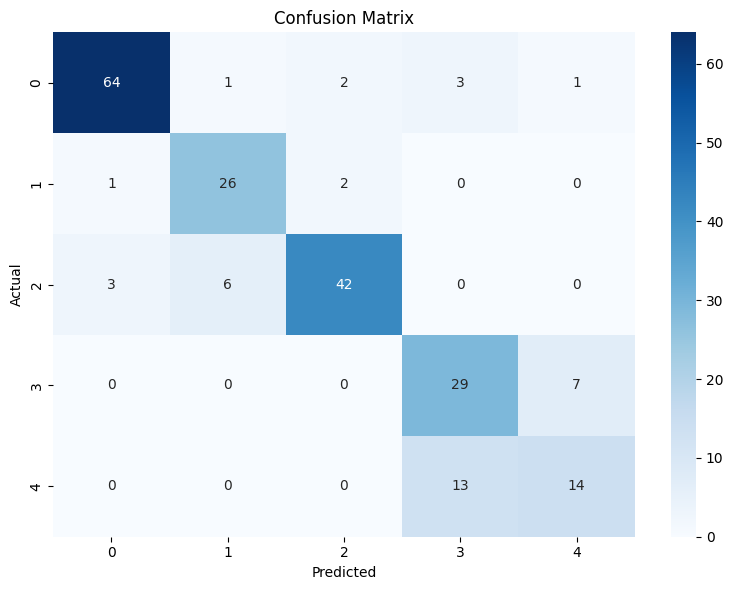

In [33]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)


print(f"Accuracy       : {accuracy:.4f}")
print(f"Precision      : {precision:.4f}")
print(f"Recall         : {recall:.4f}")
print(f"F1 Score       : {f1:.4f}")
print("\nClassification Report:\n", report)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

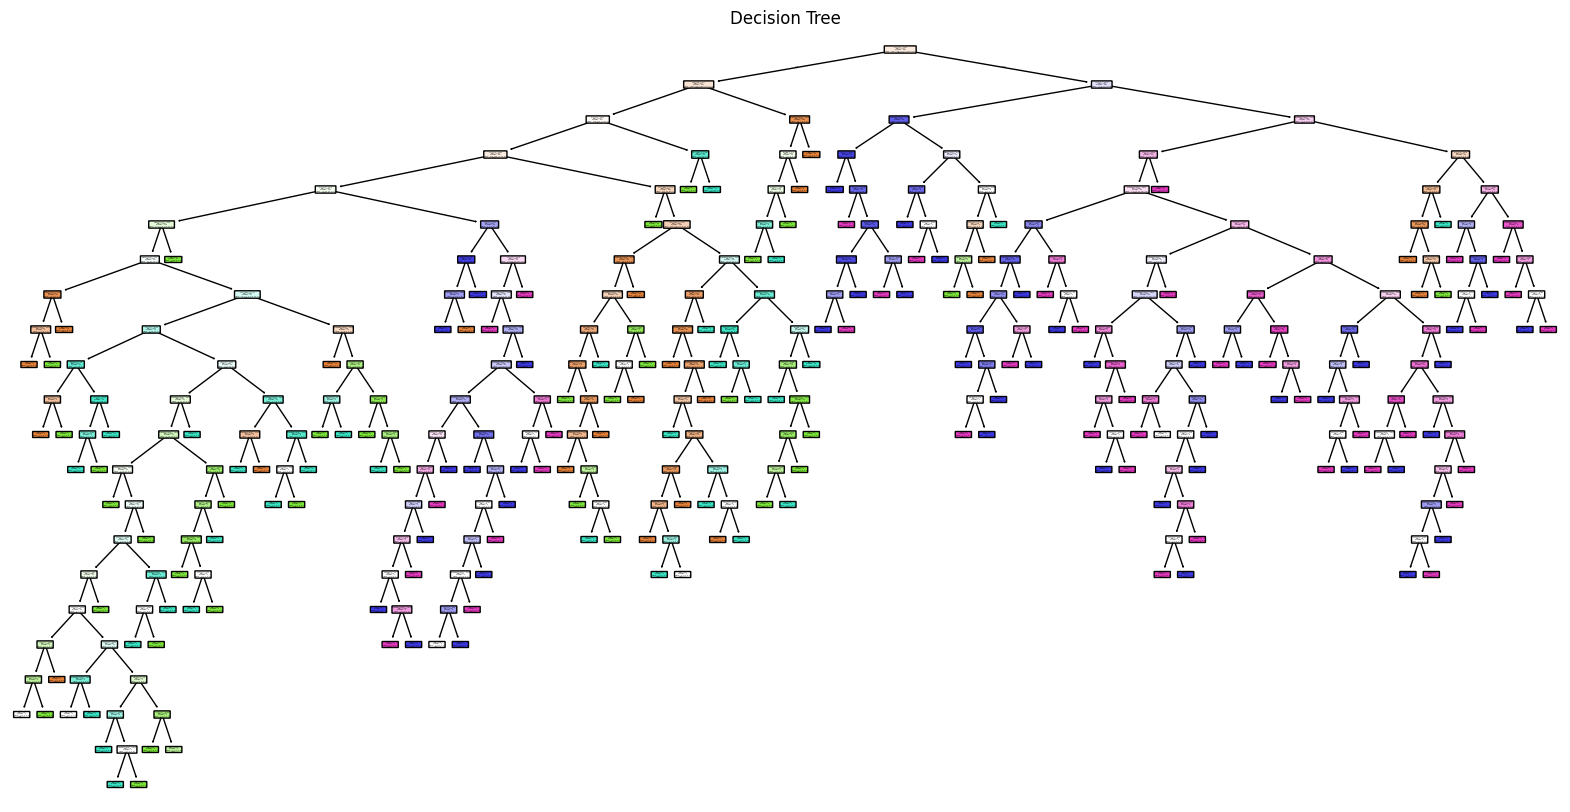

In [37]:

plt.figure(figsize=(20, 10))
plot_tree(dtc, feature_names=X.columns, class_names=[str(c) for c in dtc.classes_], filled=True, rounded=True)
plt.title("Decision Tree")
plt.show()

<Axes: title={'center': 'Importance Tree'}>

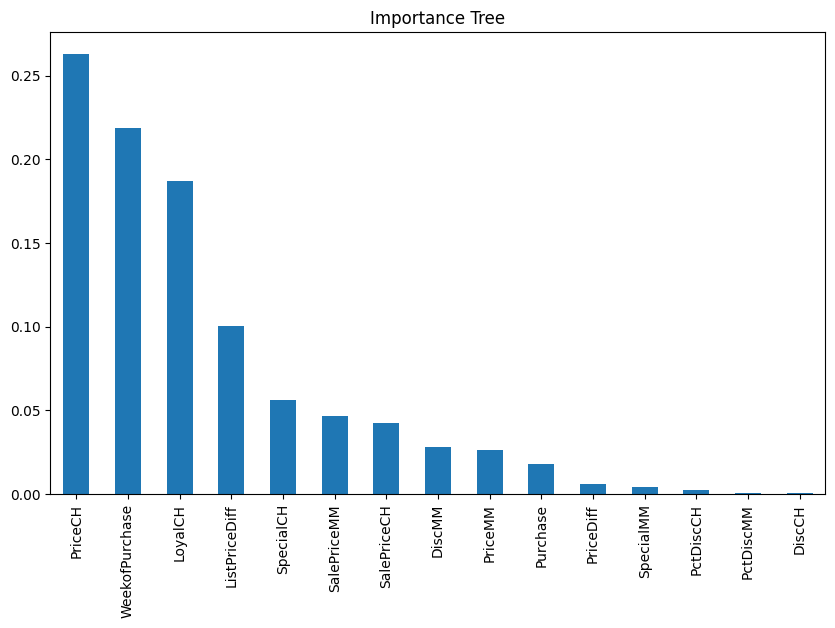

In [38]:
importances = pd.Series(dtc.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.plot(kind='bar', figsize=(10, 6), title='Importance Tree')

In [42]:
path = dtc.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]

trees = [DecisionTreeClassifier(random_state=42, ccp_alpha=alpha).fit(X_train, y_train) for alpha in ccp_alphas]
scores = [np.mean(cross_val_score(tree, X_train, y_train, cv=5)) for tree in trees]

optimal_alpha = ccp_alphas[np.argmax(scores)]
optimal_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
optimal_tree.fit(X_train, y_train)
optimal_alpha

np.float64(0.001383423512051154)

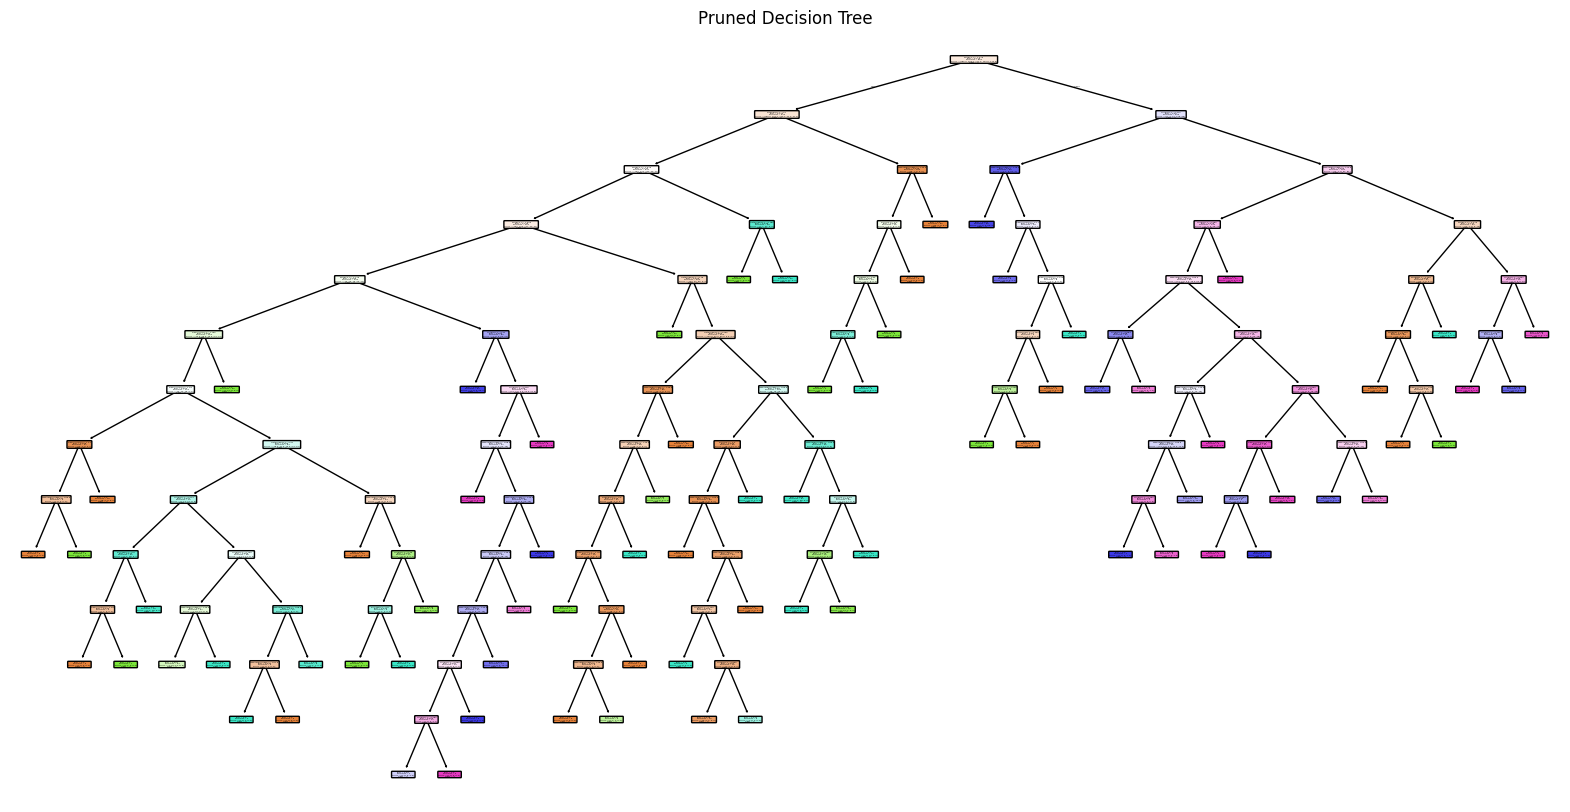

<Axes: title={'center': ' Pruned Tree'}>

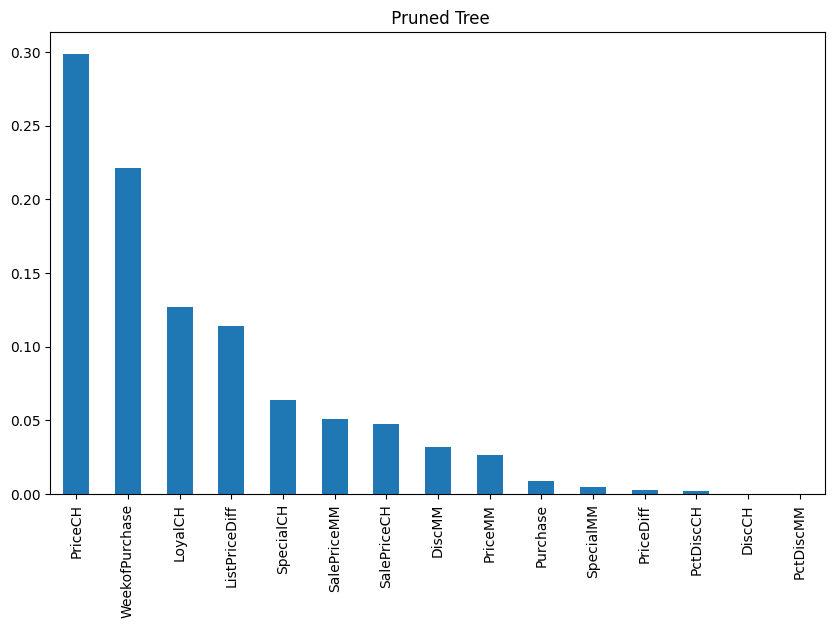

In [43]:
y_pred_pruned = optimal_tree.predict(X_test)
accuracy_score(y_test, y_pred_pruned), precision_score(y_test, y_pred_pruned, average='weighted', zero_division=0), recall_score(y_test, y_pred_pruned, average='weighted'), f1_score(y_test, y_pred_pruned, average='weighted')

plt.figure(figsize=(20, 10))
plot_tree(optimal_tree, feature_names=X.columns, class_names=[str(c) for c in dtc.classes_], filled=True, rounded=True)
plt.title("Pruned Decision Tree")
plt.show()

importances_pruned = pd.Series(optimal_tree.feature_importances_, index=X.columns).sort_values(ascending=False)
importances_pruned.plot(kind='bar', figsize=(10, 6), title=' Pruned Tree')

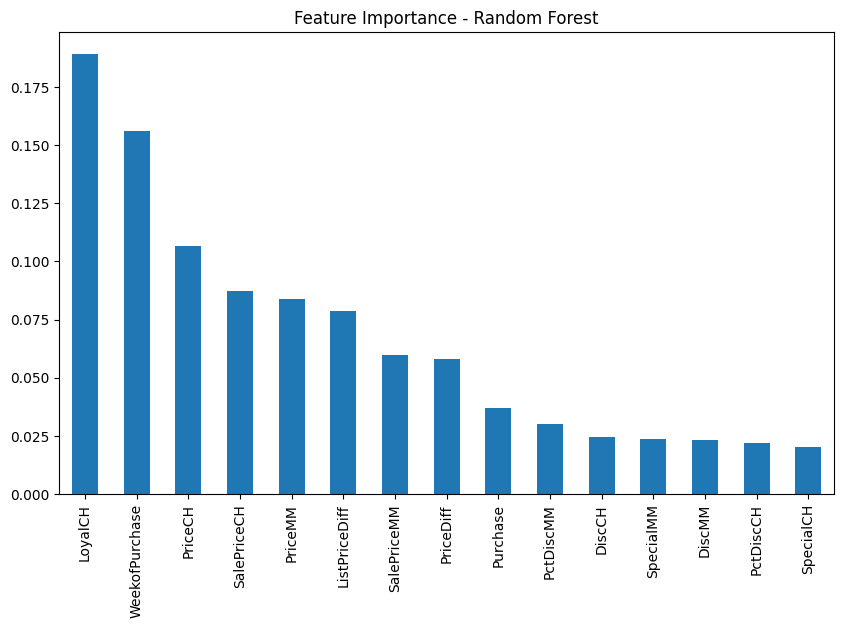

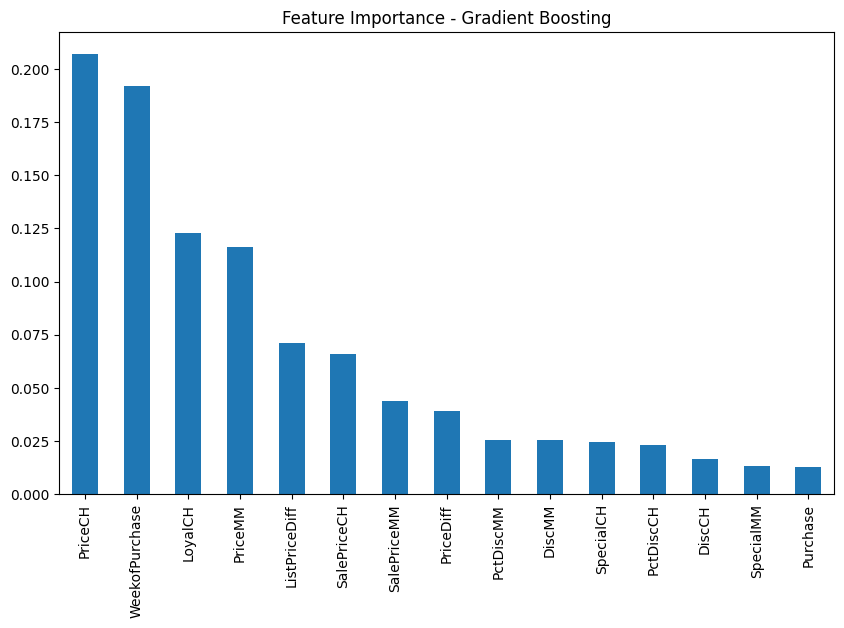

,accuracy,precision,recall,f1
Random Forest,0.845794,0.847419,0.845794,0.844445
Gradient Boosting,0.850467,0.852516,0.850467,0.849219
Bagging,0.827103,0.830962,0.827103,0.826261


In [46]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_model = model.predict(X_test)

    model_results = {
        'accuracy': accuracy_score(y_test, y_pred_model),
        'precision': precision_score(y_test, y_pred_model, average='weighted', zero_division=0),
        'recall': recall_score(y_test, y_pred_model, average='weighted'),
        'f1': f1_score(y_test, y_pred_model, average='weighted')
    }

    if hasattr(model, "feature_importances_"):
        model_results['importances'] = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
        model_results['importances'].plot(kind='bar', figsize=(10, 6), title=f'Feature Importance - {name}')
        plt.show()

    results[name] = model_results

pd.DataFrame(results).T.drop(columns=['importances'], errors='ignore')